In [2]:
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/retail_sales_dataset.csv')

In [4]:
df=data.copy()

In [5]:
df.shape

(1000, 9)

In [6]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(8)

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [10]:
df.describe()

,transaction_id,age,quantity,price_per_unit,total_amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## Duplications

In [11]:
print(df.duplicated().sum())

0


## Feature Extracton

In [12]:
df['date']=pd.to_datetime(df['date'], errors= 'coerce')
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year
df['weekday'] = df['date'].dt.day_name()
df.head(8)

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,day,month,year,weekday
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,24,11,2023,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,27,2,2023,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,13,1,2023,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,21,5,2023,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,6,5,2023,Saturday
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,25,4,2023,Tuesday
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,13,3,2023,Monday
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,22,2,2023,Wednesday


## Outliers Detection and Handling

In [13]:
def outlier(data):
  outliers = []
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z_score = (i - mean)/std
    if np.abs(z_score) > 3:
      outliers.append(i)
  return outliers

In [14]:
df.age

,age
0,34
1,26
2,50
3,37
4,30
...,...
995,62
996,52
997,23
998,36


In [15]:
(df['age'] < 0).sum()

np.int64(0)

In [16]:
list_1 = outlier(df.age)

In [17]:
len(list_1)

0

## Trends, Patterns And Correlations

In [18]:
(df['quantity'] < 0).sum()

np.int64(0)

In [19]:
(df['price_per_unit'] < 0).sum()

np.int64(0)

## Univariate Analysis

<Axes: xlabel='age', ylabel='Count'>

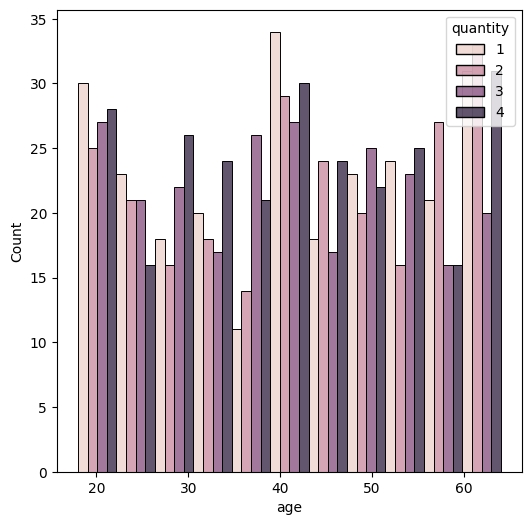

In [29]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x='age',hue='quantity',stat='count',multiple='dodge')

## Bivariate Analysis

### Numeric vs Numeric

In [30]:
monthly_sales = df.groupby('month')['total_amount'].sum()
monthly_sales

,total_amount
month,
1,36980
2,44060
3,28990
4,33870
5,53150
6,36715
7,35465
8,36960
9,23620


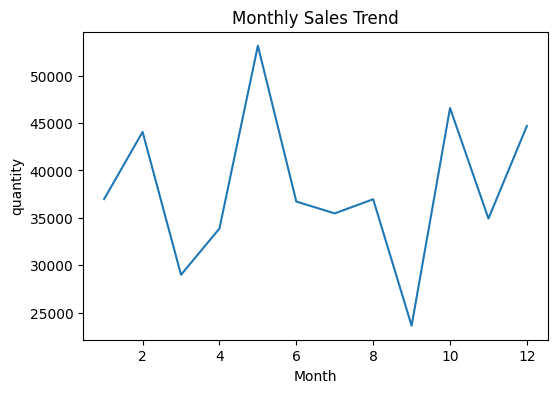

In [22]:
plt.figure(figsize=(6,4))
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('quantity')
plt.show()

In [23]:
category_summary = df.groupby('product_category')['total_amount'].sum()
category_summary

,total_amount
product_category,
Beauty,143515
Clothing,155580
Electronics,156905


<Axes: xlabel='product_category', ylabel='total_amount'>

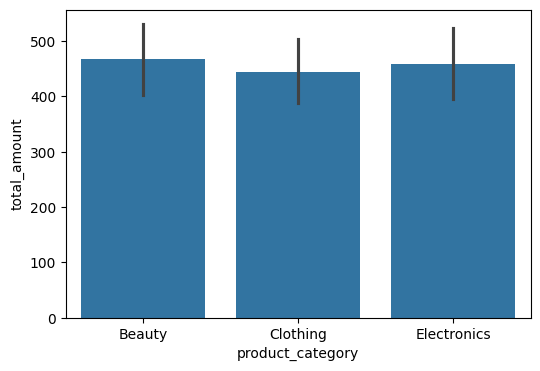

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='product_category', y='total_amount')

## MultiVariate Analysis

### Correlation

In [25]:
new_df= df[['day','age','quantity','price_per_unit']]

In [26]:
new_df.corr()

,day,age,quantity,price_per_unit
day,1.000000,0.041899,0.029650,0.018303
age,0.041899,1.000000,-0.023737,-0.038423
quantity,0.029650,-0.023737,1.000000,0.017501
price_per_unit,0.018303,-0.038423,0.017501,1.000000


<Axes: >

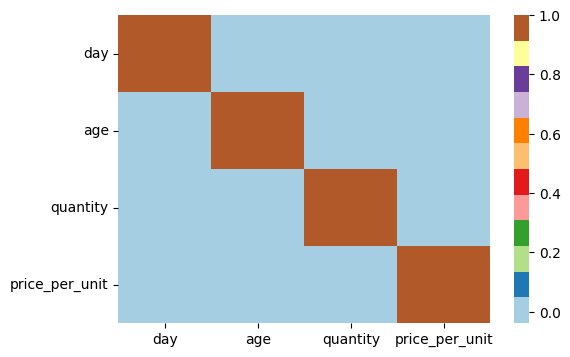

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(new_df.corr(),cmap='Paired')

In [28]:
df.to_csv('final_table.csv', index=False)